In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

b. reading dataset

In [15]:
train_df = pd.read_csv('../content/mnist_train.csv')
test_df = pd.read_csv('../content/mnist_test.csv')

In [18]:
test_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c. train test splitting

In [21]:
#x_train: train without label (outcome)
x_train = train_df.drop(['label'], axis=1).values
#ytrain = train df only label
y_train = train_df['label'].values
#x_test = test without label
x_test = test_df.drop(['label'],axis=1).values
#y_test = test df only label
y_test = test_df['label'].values

network architechture for keras

In [28]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


train model with sgd 11 epochs

In [29]:
history = model.fit(x_train,y_train,epochs=11, batch_size=32, validation_split=0.2)
r= model.fit(x_train,y_train,validation_split=0.2, batch_size=128, epochs=11)

Epoch 1/11


1500/1500 [==============================] - 4s 2ms/step - loss: 1.8669 - accuracy: 0.6148 - val_loss: 0.6413 - val_accuracy: 0.8468
Epoch 2/11
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7816 - accuracy: 0.7714 - val_loss: 0.4692 - val_accuracy: 0.8813
Epoch 3/11
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.8234 - val_loss: 0.3885 - val_accuracy: 0.9093
Epoch 4/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8615 - val_loss: 0.3550 - val_accuracy: 0.9142
Epoch 5/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4042 - accuracy: 0.8889 - val_loss: 0.2830 - val_accuracy: 0.9288
Epoch 6/11
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3143 - accuracy: 0.9146 - val_loss: 0.2417 - val_accuracy: 0.9403
Epoch 7/11
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2877 - accuracy: 0.9240 - val_loss: 0.2223 - val_accurac

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 944us/step - loss: 0.2658 - accuracy: 0.9664


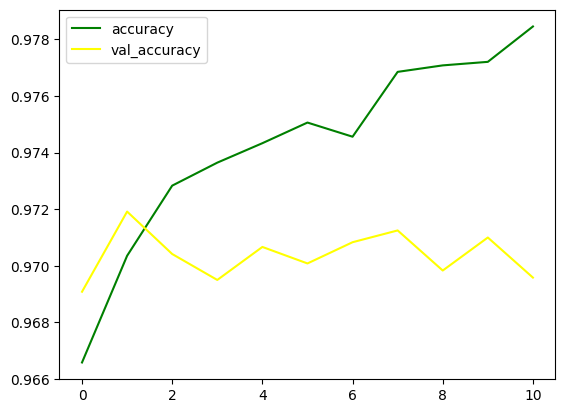

In [33]:
plt.plot(r.history['accuracy'], label='accuracy', color='green')
plt.plot(r.history['val_accuracy'], label='val_accuracy', color='yellow')
plt.legend()

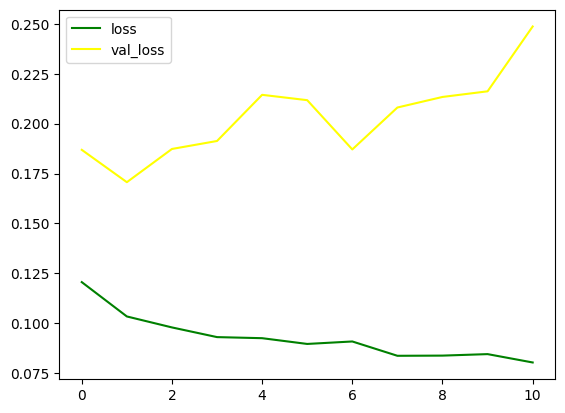

In [34]:
plt.plot(r.history['loss'], label='loss', color='green')
plt.plot(r.history['val_loss'], label='val_loss', color='yellow')
plt.legend()